
# Shell-Average Survey with Time Averaging

This example describes how to:
1. Create a time average from a set of Shell_Avg files
2. Plot time-averaged Shell_Avg results from multiple runs at once

To run this script, you require:
1.  At least one Rayleigh simulation's Shell_Avg data (preferably 2 or more)
2.  A directory structure such that all simulation directories reside within the same subdirectory.  e.g., survey/case1, survey/case2, survey/case3  etc.


In [1]:
from rayleigh_diagnostics import Shell_Avgs, build_file_list, TimeAvg_ShellAverages
import matplotlib.pyplot as plt
import numpy

In [2]:
pref = ['./']  
cases=['ek1em3_ra1e6_fr0', 'ek1em3_ra1e6_fr0.1', 'ek1em3_ra1e6_fr0.5', 
       'ek1em3_ra1e6_fr1.0', 'ek1em3_ra1e6_fr1.5' ]
#Build a list of shell_average files
imin = 0
imax = 100000000 # 100 million
numavg = 2   # Number of Shell_Avg files

In [3]:
comp_files=[]
for p in pref:
    ctemp=[]
    for c in cases:
        case_path = p+c
        files = build_file_list(imin,imax,path = case_path+'/Shell_Avgs')  # Build file list
        nf = len(files)   # grab first and last iter for compiled file  name
        files = files[nf-numavg:nf]
        nf = len(files)
        f0 = files[0].split('/')
        f1 = files[nf-1].split('/')
        i0 = f0[len(f0)-1]
        i1 = f1[len(f1)-1]
        comp_file=case_path+'/sacomp_'+i0+'_'+i1
        ctemp.append(comp_file)
        TimeAvg_ShellAverages(files,comp_file)
    comp_files.append(ctemp)

In [4]:
#Loop over the compiled files
savgs = []
for cf in comp_files[0]:
    s = Shell_Avgs(cf,path='')
    savgs.append(s)

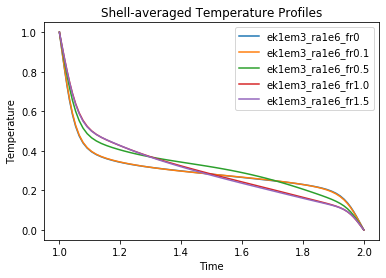

In [5]:
%matplotlib inline
fig, ax = plt.subplots()
for i,s in enumerate(savgs):
    ax.plot(s.radius,s.vals[:,0,s.lut[501]], label=cases[i])
#ax.set_yscale('log')
#ax.set_ylim([5e3,1.5e4])
#ax.set_xlim([0.1,2.5])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Shell-averaged Temperature Profiles')
ax.legend()
plt.show()


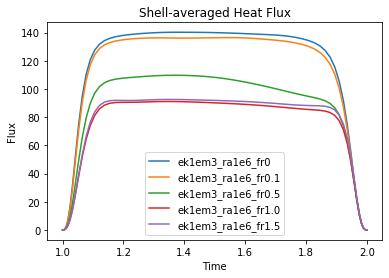

In [6]:
%matplotlib inline
fig, ax = plt.subplots()
fpr = 4.0*numpy.pi*s.radius[:]*s.radius[:]

for i,s in enumerate(savgs):
    heat=s.vals[:,0,s.lut[1440]].reshape(s.nr)
    ax.plot(s.radius,heat*fpr, label=cases[i])
ax.set_xlabel('Time')
ax.set_ylabel('Flux')
ax.set_title('Shell-averaged Heat Flux')
ax.legend()
plt.show()

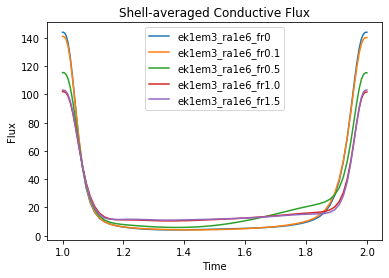

In [7]:
%matplotlib inline
fig, ax = plt.subplots()

for i,s in enumerate(savgs):
    cond=s.vals[:,0,s.lut[1470]].reshape(s.nr)
    ax.plot(s.radius,cond*fpr, label=cases[i])
ax.set_xlabel('Time')
ax.set_ylabel('Flux')
ax.set_title('Shell-averaged Conductive Flux')
ax.legend()
plt.show()

In [17]:
ro = 2.0  # router
ri = 1.0  # rinner -- both of these change with aspect ratio
A = (ri**2)*(ro**2)/(ro**2 - ri**2)

#dTdr = A/r^2 = Conductive flux
#Nusselt Number = volume_integral{realize conductive + convective flux}/volum_integral{conductive-state conductive flux}

for i,s in enumerate(savgs):
    F = A/s.radius**2
    nr = s.nr
    radius = s.radius
    weights=numpy.zeros(s.nr,dtype='float64')
    weights[0] = (s.radius[0]-s.radius[1])*0.5*radius[0]**2
    weights[nr-1] = (s.radius[nr-2]-s.radius[nr-1])*0.5*radius[nr-1]**2
    for j in range(1,nr-1):
        dr = radius[j-1]-radius[j+1]
        weights[j]=dr*radius[j]**2
    cond=s.vals[:,0,s.lut[1470]].reshape(s.nr)
    heat=s.vals[:,0,s.lut[1440]].reshape(s.nr)
    num = cond+heat
    denom = F
    num_int = numpy.sum(weights*num)
    denom_int = numpy.sum(weights*denom)
    #print(num_int, denom_int)
    nu = num_int/denom_int
    print('Nu = ',nu)
    ax.plot(s.radius,cond*fpr, label=cases[i])

1.3333333333333333
Nu =  8.608947239290183
Nu =  8.403010935535564
Nu =  6.8915864762325185
Nu =  6.064168532525135
Nu =  6.171412598126512
